![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Time Series Visualizer

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() #https://pandas.pydata.org/docs/reference/api/pandas.plotting.register_matplotlib_converters.html

In [48]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('C:/Users/catte/Dropbox/Tech Learning/GitHub/FreeCodeCamp/FCC_8/finalStudies/time_series_visualizer/fcc-forum-pageviews.csv')
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Use what we learned in Medical Data
`(df['height'] >= df['height'].quantile(0.025))`

In [49]:
# Clean Data     
df = df.drop(df[(df['value']<df['value'].quantile(0.025)) | 
                (df['value']>df['value'].quantile(0.975))].index)

len(df)


1238

`It went from 1304 to 1238`

## Draw Line Chart
`As the data is already setup to have one row for each column, we do not need to melt() any DataFrame.`

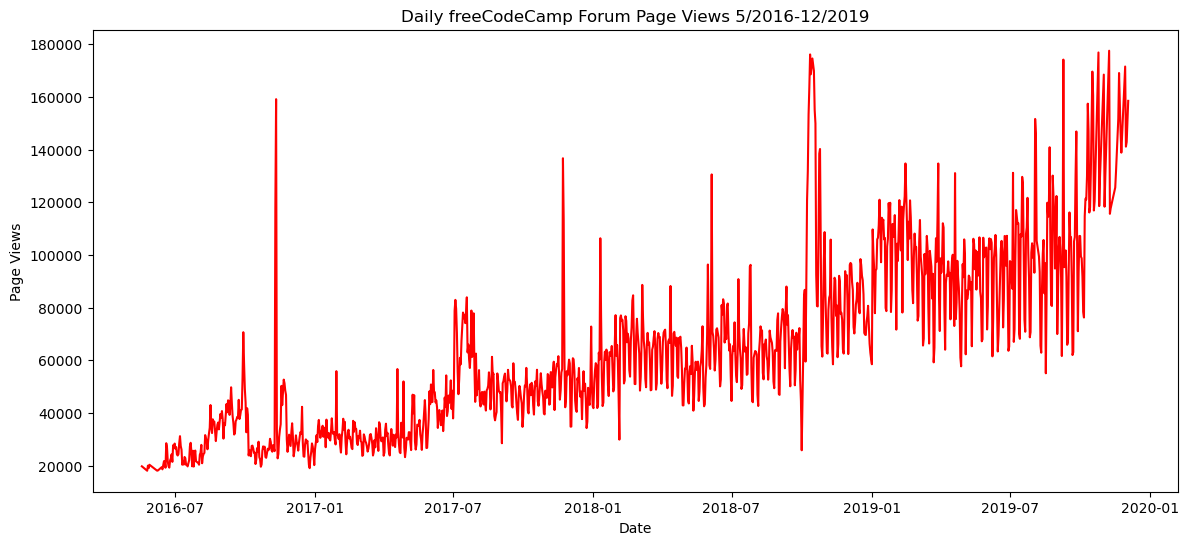

In [50]:
def draw_line_plot():
    # Draw line plot
    '''
    Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
    The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
    The label on the x axis should be 'Date' and the label on the y axis should be 'Page Views'.
    '''
    # Copy the Dataframe
    line_plt = df

    plt.figure(figsize=(14, 6))
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.plot(line_plt.index, line_plt.value, color='red')

    # Save image and return fig (don't change this part)
    #fig.savefig('line_plot.png')
    #return fig
draw_line_plot()

## Draw Bar Chart

   Year      Month  Avg Page Views
0  2016        May         19432.0
1  2016       June         21875.0
2  2016       July         24110.0
3  2016     August         31049.0
4  2016  September         41477.0


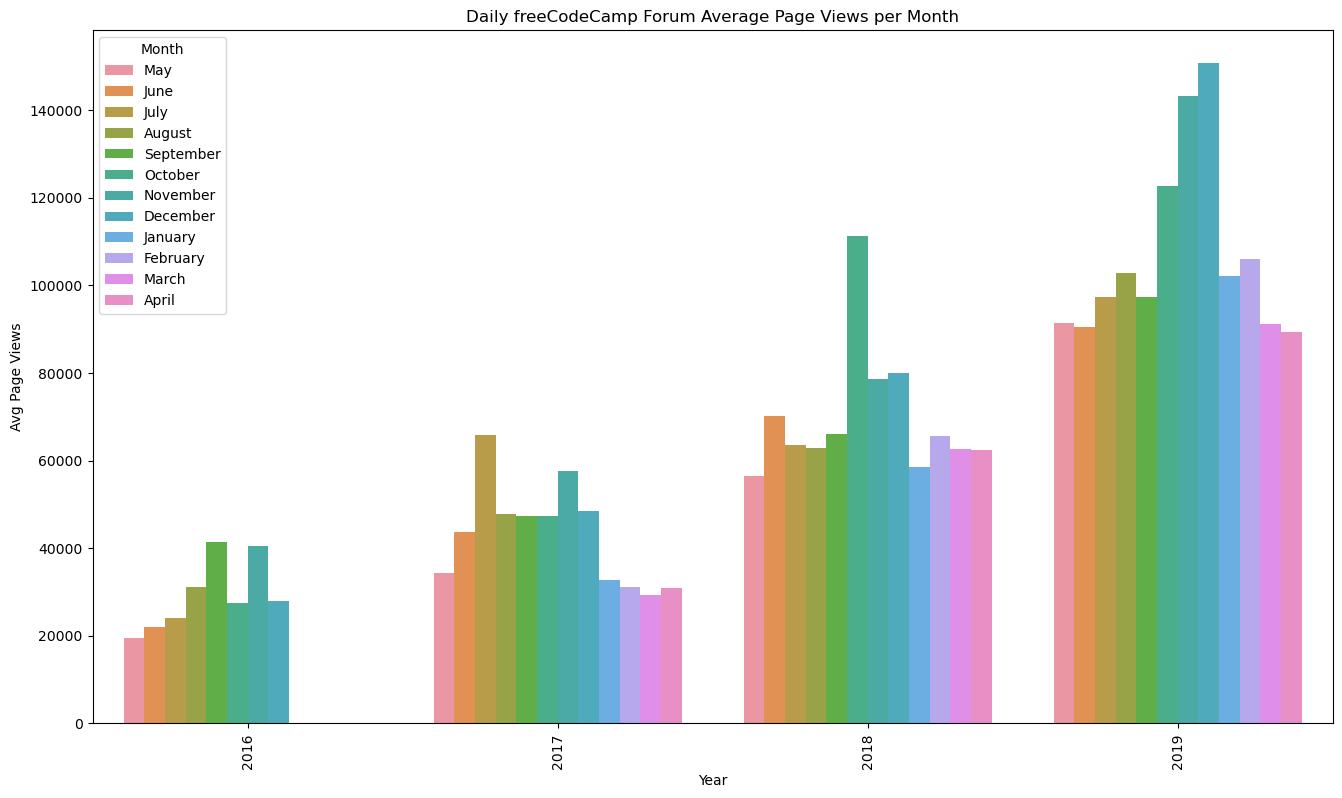

In [76]:
def draw_bar_plot():
    '''Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
    It should show average daily page views for each month grouped by year. 
    The legend should show month labels and have a title of Months. On the chart, 
    the label on the x axis should be Years and the label on the y axis should be Average Page Views.'''
    # Copy and modify data for monthly bar plot
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["Year"] = df_bar.index.year
    df_bar["Month"] = df_bar.index.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(["Year", "Month"], sort=False)["value"].mean().round())
    df_bar = df_bar.rename(columns={"value": "Avg Page Views"})
    df_bar = df_bar.reset_index()
    print(df_bar.head())

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")
    bar_chart = sns.barplot(data=df_bar, x="Year", y="Avg Page Views", hue="Month")
    bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=90, horizontalalignment='center')


    # Save image and return fig (don't change this part)
    # fig.savefig('bar_plot.png')
    # return fig

draw_bar_plot()

## Draw Box Plot

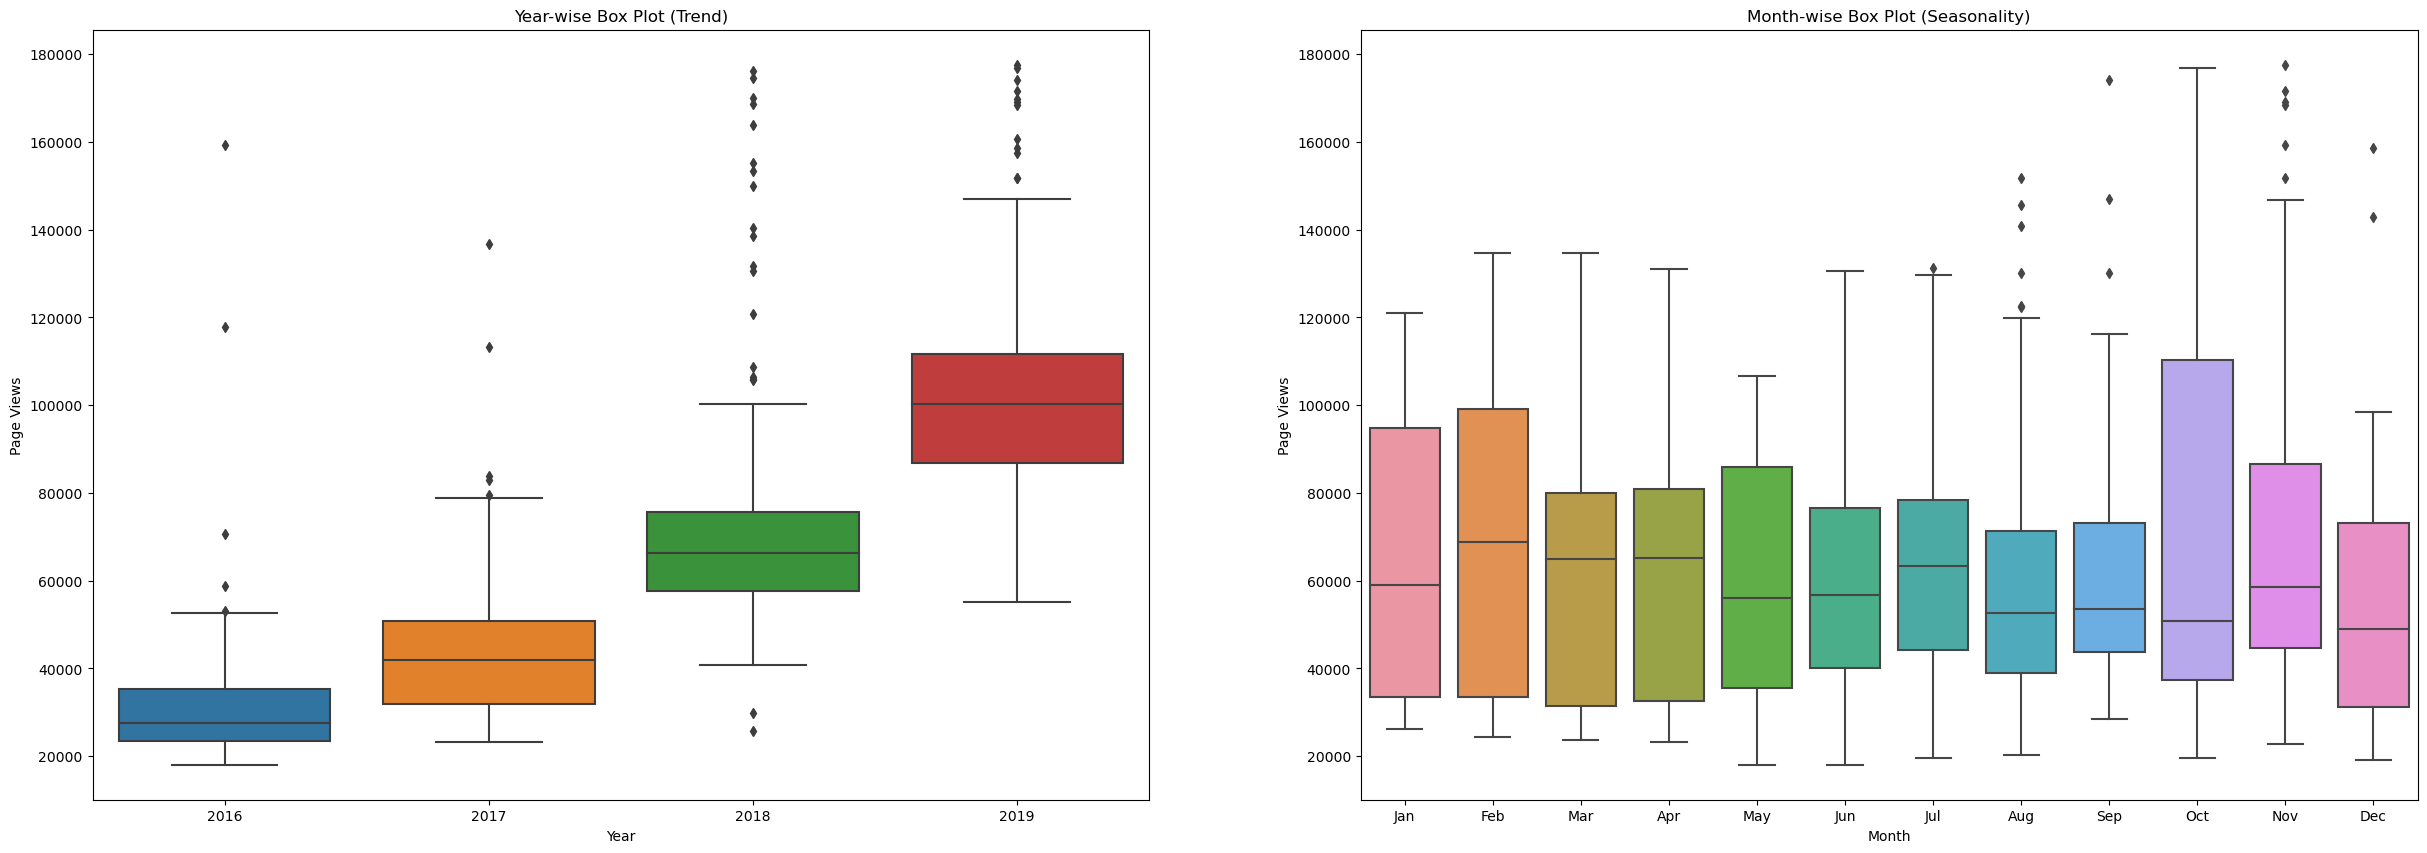

In [77]:
def draw_box_plot():
    '''Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 
    These box plots should show how the values are distributed within a given year or month and how it compares over time. 
    The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). 
    Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
    The boilerplate includes commands to prepare the data.'''
    
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1, 2, figsize=(30, 10))
    
    # Yearly
    sns.boxplot(data=df_box, x="year", y="value", ax=ax[0])
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    
    # Monthly
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=ax[1])
    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
    #fig.savefig('box_plot.png')
    #return fig

draw_box_plot()